# Lecture 2: Concentration Inequalities

In this lecture we will study one of the most important probabilistic results for learning: concentration inequalities. Concentration inequalities are as foundational as it gets: they give us the predictability of the data that allows us to learn. They also tell us how many samples we need to be confident about the prediction we are making. We will see some examples of learning and testing tasks that we can solve using these inequalities in the next lecture.

We will start with the simplest concentration inequality: Markov Inequality. Then we will build on this basic inequality to obtain other inequalities such as the concentration inequalities Chebyshev, Chernoff, and Hoeffding. There are other inequalities too that we will not cover and some of them even apply to matrices! If you are curious to learn more, search for "Bernstein's inequalities." 

## Markov Inequality

Markov inequality is the simplest concentration inequality, which should be your 'go-to' tool when you don't know much about the distribution of your random variable/data. \textbf{It only applies to non-negative random variables}, so make sure you are not trying to apply it to a random variable that can take negative values. 

Given a non-negative random variable $X$ with finite expectation $\mathbb{E}[X]$ and $t > 0$, Markov Inequality states that

\begin{equation*}
\mathbb{P}[X \geq t] \leq \frac{\mathbb{E}[X]}{t}.
\end{equation*}

This inequality can be proved in only a few lines. It requires using that for non-negative random variables, it holds that

\begin{equation*}
\mathbb{E}[X] = \int_0^{\infty} \mathbb{P}[X \geq x]\mathrm{d} x,
\end{equation*}

(The proof can be found in basic probability texts and even on the Wikipedia page for the expected value. For a discrete random variable taking values in $\{0, 1, 2, \dots\}$, you would use $\mathbb{E}[X] = \sum_{k=1}^{\infty}\mathbb{P}[X \geq k].$ It is also possible to write the proof for a discrete random variable taking any discrete values; we might do this proof in class or in one of the discussion sessions.)

(!) Before looking at the derivation below, try to derive Markov Inequality on your own using what I have just told you!

Given $t > 0$ and a non-negative random variable $X$, we have:

\begin{align*}
    \mathbb{E}[X] &= \int_0^{\infty} \mathbb{P}[X \geq x]\mathrm{d} x\\
    &\geq \int_0^{t} \mathbb{P}[X \geq x]\mathrm{d} x\\
    &\geq \int_0^{t} \mathbb{P}[X \geq t]\mathrm{d} x\\
    &= t {P}[X \geq t].
\end{align*}

Thus we can conclude that $\mathbb{P}[X \geq t] \leq \frac{\mathbb{E}[X]}{t}$. We can also equivalently write Markov Inequality as
$$
    \mathbb{P}[X \geq t \mathbb{E}[X]] \leq \frac{1}{t}.
$$

\begin{example} Going back to our example of Bernoulli random variables, consider $X \sim \mathrm{Bernoulli}(p)$ for $p \in (0, 1).$ This random variable only takes two values $-$ 0 and 1. As we discussed in the previous lecture, $\mathbb{E}[X] = p.$ Markov Inequality gives us an estimate $\mathbb{P}[X \geq t p] \leq \frac{1}{t},$ for $t > 0.$
\end{example}

You may be wondering why I gave the example of a Bernoulli random variable. After all, we know such random variables only take values 0 and 1 and $p$ already tells us what the probability of each of these values is. As it turns out, the example above is the simplest example that shows that Markov Inequality is in fact tight (provided all you know about your random variable is that it is non-negative). To see this, for any $t > 1$, consider the case of a random variable $X \sim \mathrm{Bernoulli}(p)$ with $p = 1/t$. Then, based on the example above, Markov inequality tells us that 
$$
\mathbb{P}[X \geq t p] = \mathbb{P}[X \geq 1] = \mathbb{P}[X = 1] \leq \frac{1}{t} = p.
$$ 

It is also possible to scale this example and obtain an alternative (though quite similar) tight example.

\begin{example}
Consider a random variable $X_k$ that, for some fixed $k > 1$, takes value 0 with probability $1 - \frac{1}{k^2}$ and value $k$ with probability $\frac{1}{k^2}.$ The expected value of this random variable is $\frac{1}{k}.$ Markov inequality predicts that $(\mathbb{P}[X_k = k]=) \mathbb{P}[X_k \geq k] \leq \frac{1/k}{k} = \frac{1}{k^2},$ which holds with equality.
\end{example}

Markov inequality is often used to estimate the fraction of high scores or, more generally values that are much higher than the mean. 

\begin{example}
Suppose that on our upcoming homework the class average is 80%. What is the highest proportion of students who can score 95+%?

Let $X$ denote the score of a randomly chosen student. Applying Markov inequality, we get that $\mathbb{P}[X \geq 95] \leq \frac{80}{95} = \frac{16}{19}\approx 0.84.$ So at most 84% of the class can score 95% or higher. When would this average be achieved though?
\end{example}

Looking at the previous example, it might seem unlikely that 84% of the class scores over 95% on the homework that has an average of 80% (though it's not impossible). Now let's consider the following case.

\begin{example}
Same as in the previous example, assume that the class average on the homework is 80%, but now the minimum anyone scores is 60%. Then it is possible to obtain a tighter estimate of what proportion of students score 95% and higher by observing that $Y = X - 60$ is non-negative, where $X$ is the random variable corresponding to the score. Our estimate using Markov inequality now becomes $\mathbb{P}[Y \geq 35] \leq \frac{\mathbb{E}[Y]}{35} = \frac{\mathbb{E}[X] - 60}{35} = \frac{20}{35} = \frac{4}{7} \approx 0.57.$ So in this case at most 57% of the class can score 95% or higher. 
\end{example}

As you should expect, Markov inequality can also be quite loose, as illustrated in the following example.

\begin{example}
Consider the event of tossing a fair coin 10 times and getting all heads. Of course, we know the probability of this event; it is $\big(\frac{1}{2}\big)^{10}.$ This probability is slightly lower than in one in a thousand. Now let us consider the estimate we would have gotten by applying Markov inequality. The expected number of heads for a fair coin in 10 coin tosses is 5. (Recall that we can define each coin toss as a separate random variable $X_i$ which takes value 1 if we get heads and zero otherwise. Then the total number of heads is the random variable equal to the sum $S_n = X_1 + X_2 + \dots X_n$ with $n = 10$.) Markov inequality estimates the probability of 10 heads as $\frac{5}{10} = \frac{1}{2},$ which is over 500 times higher than the true probability $\big(\frac{1}{2}\big)^{10}$ that we already computed. 
\end{example}

## Chebyshev Inequality

You should already be asking yourself whether making more assumptions about our random variables could give us tighter inequalities. Since we are still talking about concentration inequalities, the answer should clearly be 'yes' :)

The first approach to tightening our concentration inequality is by assuming that our random variable $X$, in addition to having finite mean, also has finite variance. With this assumption, we get Chebyshev inequality, which states that for any $t > 0$,

$$
    \mathbb{P}[|X - \mathbb{E}[X]| \geq t] \leq \frac{\mathrm{Var}[X]}{t^2}.
$$

It is possible to derive Chebyshev inequality directly from Markov inequality. To see this, notice that the variance is defined by

$$
    \mathrm{Var}[X] = \mathbb{E}[(X - \mathbb{E}[X])^2].
$$

So let us define a new random variable $Y = (X - \mathbb{E}[X])^2$. Clearly, $Y$ is non-negative, and thus Markov inequality applies. 

Applying Markov inequality to $Y$, we get

\begin{align*}
    \mathbb{P}[Y \geq t^2] \leq \frac{\mathbb{E}[Y]}{t^2}.
\end{align*}

But, as we have already noted, $Y = (X - \mathbb{E}[X])^2$ , and so the right-hand side of the above inequality is the same as the right-hand side of the stated Chebyshev inequality. So it only remains to argue that the left-hand side is the same. This follows simply from the definition of $Y$, as

\begin{align*}
    \mathbb{P}[Y \geq t^2] &= \mathbb{P}[(X - \mathbb{E}[X])^2 \geq t^2]\\
    &= \mathbb{P}[|X - \mathbb{E}[X]| \geq t].
\end{align*}

\begin{example}
Let us go back to our example of tossing a fair coin 10 times and getting 10 heads. The variance in this case is $\frac{10}{4} = 2.5$ (why?). Chebyshev inequality thus predicts that the probability of tossing exactly 10 heads is bounded by $\frac{2.5}{5^2} = 0.1.$ This is still not tight, but it is much better than the $0.5$ bound we got from Markov inequality.
\end{example}

As you can expect based on the discussion we had about Markov inequality, Chebyshev inequality is also tight if the only thing we are assuming about a random variable is that it has bounded mean $\mu$ and variance $\sigma^2$. This is illustrated in the following example.

\begin{example}
Consider the random variable $X$ that takes value $-k$ with probability $\frac{1}{2k^2},$ $+k$ with probability $\frac{1}{2k^2}$, and $0$ with probability $1 - \frac{1}{k^2}.$ The mean and the variance of this random variable are $\mu = 0$ and $\sigma^2 = 1.$ Chebyshev inequality predicts the following bound for $X$:

$$
    \mathbb{P}[|X - \mu| \geq  k] = \mathbb{P}[|X| \geq k] \leq \frac{1}{k^2},
$$

which holds with equality, as $\mathbb{P}[|X| \geq k] = \mathbb{P}[|X| = k] = \mathbb{P}[X = k] + \mathbb{P}[X = -k] = \frac{1}{k^2}.$
\end{example}

Chebyshev inequality can also be used to get a more quantifiable law of large numbers (and also prove the WLLN we stated last time). In particular, for $n$ i.i.d. random variables $X_1, X_2, \dots, X_n$ with mean $\mu$ and variance $\sigma^2$, we have that 

$$
    \mathbb{E}\Big[\frac{X_1 + X_2 + \dots + X_n}{n}\Big] = \mu, \quad\quad\quad \mathrm{Var}\Big[\frac{X_1 + X_2 + \dots + X_n}{n}\Big] = \frac{\sigma^2}{n}.
$$

Applying Chebyshev inequality, for any $\epsilon > 0$, we have

\begin{align*}
    \mathbb{P}\Big[\Big|\frac{X_1 + X_2 + \dots + X_n}{n} - \mu\Big| \geq \epsilon\Big] \leq \frac{\sigma^2}{n \epsilon^2}. 
\end{align*}

Thus, for any $\epsilon > 0$, we can take $n$ large enough to make the probability that the empirical mean deviates from the true mean by more than $\epsilon$ arbitrarily small. Chebyshev inequality actually gives us more than that. It tells us that if we want to make the probability that the empirical and true mean differ by more than $\epsilon$ at most $\delta$ (for some $\delta > 0$), then it suffices to take $n \geq \frac{\sigma^2}{\epsilon^2 \delta}.$ 

Let us note also that the above assumption that $X_i$'s are i.i.d. can be relaxed to $X_i$'s being _pairwise independent_ (that is, we only need that $\forall i, j \in \{1, \dots, n\},$ $i \neq j$, $\mathbb{E}[X_i X_j] = \mathbb{E}[X_i]\mathbb{E}[X_j]$). It is also possible to obtain a variant of this result for $X_i$'s that have different means and variances (you are encouraged to do that as an exercise). 

Finally, let us observe that the Chebyshev inequality gives us the following estimate of how likely it is for a random variable to take values that fall more than $k$ standard deviations away from the mean. Applying Chebyshev inequality with $t = k\sigma$, we have

$$
    \mathbb{P}[|X - \mu| \geq k \sigma] \leq \frac{\sigma^2}{k^2 \sigma^2} = \frac{1}{k^2}.
$$

Is this good? Bad? Well, it depends... As we stated before, we cannot do better if all we know about a random variable is that it has finite mean and finite variance. But Chebyshev inequality is quite loose for random variables with "light tails," such as the Gaussian random variables. 

## Chernoff Bounds

Observe that we obtained Chebyshev inequality simply by applying Markov inequality to the random variable $Y = (X - \mathbb{E}[X])^2.$ Similarly, we can consider applying Markov inequality to higher powers of $X - \mathbb{E}[X]$; namely, to random variables $Y = |X - \mathbb{E}[X]|^k$ for $k = 3, 4, 5, \dots,$ assuming $\mathbb{E}[Y] = \mathbb{E}[|X - \mathbb{E}[X]|^k]$ is finite. This approach gives us a family of bounds which are of the form

$$
\mathbb{P}[|X - \mathbb{E}[X]| \geq t] \leq \frac{\mathbb{E}[|X - \mathbb{E}[X]|^k]}{t^k}.
$$

These bounds will generally be tighter than the bounds we get from Markov or Chebyshev inequalities, because $t^k$, for $t > 1,$ grows faster as $k$ becomes larger, and so $\frac{1}{t^k}$ approaches zero more quickly as we increase $k$. Unfortunately, it is rarely the case that we know how to easily compute $\mathbb{E}[|X - \mathbb{E}[X]|^k]$ for larger $k$ or are given this information for free. Instead, there is another related function whose expectation is often easy to compute or bound. Recall from your calculus classes that Taylor series of the exponential function $e^{X}$ is given by

$$
    e^{X} = 1 + X + \frac{X^2}{2!} + \frac{X^3}{3!} + \frac{X^4}{4!} + \dots
$$

Observe that by linearity of expectation, we can also write

$$
    \mathbb{E}[e^{X}] = 1 + \mathbb{E}[X] + \mathbb{E}\Big[\frac{X^2}{2!}\Big] + \mathbb{E}\Big[\frac{X^3}{3!}\Big] + \mathbb{E}\Big[\frac{X^4}{4!}\Big] + \dots
$$

The "Chernoff method" boils down to applying Markov inequality to $e^{\lambda X}$ for $\lambda > 0.$ Note that Markov inequality can be applied to $e^{\lambda X}$ regardless of whether $X$ is non-negative or not, since $e^{\lambda X}$ is always non-negative. The application of Markov inequality gives us a whole family of bounds parametrized by $\lambda$

$$
    \mathbb{P}[X \geq t] = \mathbb{P}[e^{\lambda X} \geq e^{\lambda t}] \leq \frac{\mathbb{E}[e^{\lambda X}]}{e^{\lambda t}} = \mathbb{E}[e^{\lambda X - \lambda t}].
$$

Given the bound stated above, we can now minimize the right-hand side over $\lambda$ to get the tightest possible bound (we'll see some examples showing how to do that in a bit). Because we are bounding large values of $X$ (i.e., the ones "to the right" in the plot of the distribution of $X$), the bound above would be referred to as the "right tail bound." We can similarly consider the "left tail bound" by applying Markov inequality for $-\lambda$, $\lambda > 0$. In this case, observe that $X \leq -t$ is equivalent to $e^{- \lambda X} \geq e^{\lambda t}.$ The application of Markov inequality in this case gives us
    
$$
    \mathbb{P}[X \leq t] = \mathbb{P}[e^{-\lambda X} \geq e^{\lambda t}] \leq \frac{\mathbb{E}[e^{-\lambda X}]}{e^{\lambda t}} = \mathbb{E}[e^{-\lambda X - \lambda t}].
$$  

Similarly as for the right tail bound, we can minimize the right-hand side of the last inequality over $\lambda > 0$ to obtain the tightest bound. 

As a function of $\lambda$ (for any $\lambda$, whether positive or not), the expectation $\mathbb{E}[e^{\lambda X}]$ is known as the moment generating function for variable $X$. 

### Gaussian (Normal) Random Variables

The most basic example for the application of Chernoff bounds is obtained for a Gaussian random variable $X \sim \mathcal{N}(\mu, \sigma^2).$ The reason we can apply it comes from the following fact.

\textbf{Fact.} The moment generating function of a Gaussian random variable with zero mean, $Z \sim \mathcal{N}(0, \sigma^2)$, is given by $\mathbb{E}[e^{\lambda Z}] = e^{\frac{\lambda^2 \sigma^2}{2}}.$

Observe that if $X \sim \mathcal{N}(\mu, \sigma^2),$ then choosing $Z = X - \mu$ we have $Z \sim \mathcal{N}(0, \sigma^2)$ (what property did I use?). Thus, with the fact above on hand, applying Chernoff bound we have the following right tail inequality

$$
    \mathbb{P}[X - \mu \geq t] \leq \mathbb{E}[e^{\lambda (X - \mu) - \lambda t}] = e^{\lambda^2 \sigma^2/2 - \lambda t},
$$

and we can obtain a similar left tail inequality, following the same strategy.

Now, because the bound above holds for any $\lambda > 0$, we can minimize the right-hand side with respect to $\lambda$ to obtain the tightest possible bound. Because the exponential function is increasing in its argument, it suffices to minimize the quadratic function $\lambda^2 \sigma^2/2 - \lambda t.$ The first derivative of this function is zero for $\lambda^* = \frac{t}{\sigma^2} > 0,$ while the second derivative is strictly positive (for any $\lambda$). This means that  $\lambda^2 \sigma^2/2 - \lambda t$ (and, consequently, $e^{\lambda^2 \sigma^2/2 - \lambda t}$) is minimized by $\lambda^* = \frac{t}{\sigma^2}.$ Hence, plugging $\lambda = \lambda^* = \frac{t}{\sigma^2}$ into the bound above, we get

$$
    \mathbb{P}[X - \mu \geq t] \leq e^{- \frac{t^2}{2\sigma^2}}. 
$$

Using the same strategy for the left tail (do this as an exercise), we can also get

$$
    \mathbb{P}[X - \mu \leq -t] \leq e^{- \frac{t^2}{2\sigma^2}}. 
$$

Combining both bounds then gives

$$
    \mathbb{P}[|X - \mu| \geq t] \leq 2 e^{- \frac{t^2}{2\sigma^2}}. 
$$

Since we can easily evaluate the probability $\mathbb{P}[|X - \mu| \geq t]$ in Python, let us illustrate how the obtained Chernoff bound compares to the exact probability $\mathbb{P}[|X - \mu| \geq t]$ and also to Chebyshev bound we derived earlier.

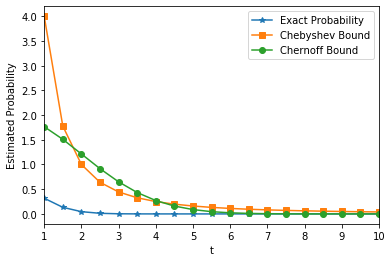

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

mu = 0 # mean
sigma2 = 4 # variance

t_min = 1
t_max = 10
t_step = .5

t = np.arange(t_min, t_max + t_step, t_step)

exact_prob = 2*(1-stats.norm.cdf(t))
chebyshev_bnd = sigma2/t**2
chernoff_bnd = 2*np.exp(- t**2/(2*sigma2))

plt.plot(t, exact_prob, marker = '*', label = 'Exact Probability')
plt.plot(t, chebyshev_bnd, marker = 's', label = 'Chebyshev Bound')
plt.plot(t, chernoff_bnd, marker = 'o', label = 'Chernoff Bound')
plt.xlim(t_min, t_max)
plt.xlabel('t')
plt.ylabel('Estimated Probability')
plt.legend()
plt.show()

Chernoff bounds are often applied for sums or averages of random variables. For example, if we had a sequence of i.i.d. Gaussian random variables $X_i \sim \mathcal{N}(\mu, \sigma^2)$, $i \in \{1, \dots, n\}$, then we know that their average $\frac{S_n}{n} = \frac{X_1 + X_2 + \dots + X_n}{n}$ is distributed according to $\mathcal{N}(\mu, \frac{\sigma^2}{n})$ and the Chernoff bound in this case tells us that

$$
    \mathbb{P}\Big[\frac{S_n}{n} - \mu \geq t\Big] \leq e^{-\frac{n t^2}{\sigma^2}}. 
$$

### Sums of Rademacher Random Variables

Another way of motivating the use of exponential function when deriving Chernoff bounds from Markov inequality is by considering sums of random variables. The reason is that we can turn a sum into a product, as $e^{X_1 + X_2} = e^{X_1} e^{X_2}.$ Furthermore, if $X_1,$ $X_2$ are independent, then $\mathbb{E}[e^{X_1} e^{X_2}] = \mathbb{E}[e^{X_1}] \mathbb{E}[e^{X_2}]$, and the same would hold if we multiplied each $X_i$ by $\lambda > 0$. 

Now consider $n$ i.i.d. random variables $X_1, X_2, \dots, X_n$ that take values +1 and -1, each with probability $\frac{1}{2}.$ These random variable are known as Rademacher random variables. They are convenient for the derivation I'll do below. It's possible to do a similar derivation for other bounded random variables, but the calculation is more annoying. 

What we will do is apply Markov inequality to $e^{\lambda S_n},$ but to do so, we need to bound the moment generating function $\mathbb{E}[e^{\lambda S_n}].$ Based on our observation above and because $X_i$'s are i.i.d., we have

\begin{align*}
    \mathbb{E}[e^{\lambda S_n}] &= \mathbb{E}[e^{\lambda (X_1 + X_2 + \dots + X_n)}]\\
    &=  \mathbb{E}[e^{\lambda X_1} e^{\lambda X_2}\dots e^{\lambda X_n}]\\
    &= \mathbb{E}[e^{\lambda X_1}]\mathbb{E}[e^{\lambda X_2}]\dots \mathbb{E}[e^{\lambda X_n}]\\
    &= \Big(\mathbb{E}[e^{\lambda X_1}]\Big)^n.
\end{align*}

Now, $X_1$ takes values +1 and -1 with probability $\frac{1}{2}$ each so by explicitly writing the expectation above we have $\mathbb{E}[e^{\lambda X_1}] = \frac{1}{2}e^{\lambda} + \frac{1}{2}e^{-\lambda}.$ Recall now once again that the Taylor series for $e^{\lambda}$ is $1 + \frac{\lambda}{1!} + \frac{\lambda^2}{2!} + \frac{\lambda^3}{3!}\dots,$ and, similarly, $e^{-\lambda} = 1 - \frac{\lambda}{1!} + \frac{\lambda^2}{2!} - \frac{\lambda^3}{3!}\dots.$ Hence, we obtain the bound

\begin{align*}
    \mathbb{E}[e^{\lambda S_n}] &=  \Big(1 + \frac{\lambda^2}{2!} + \frac{\lambda^4}{4!} + \dots\Big)\\
    &\leq \Big(1 + \frac{\lambda^2}{2 \cdot 1!} + \frac{\lambda^4}{2^2 \cdot 2!} + \dots\Big)\\
    &= \big(e^{\lambda^2/2}\big)^n\\
    &= e^{\frac{\lambda^2 n}{2}}. 
\end{align*}

Applying Markov inequality to $e^{\lambda S_n}$ and combining with the bound on $\mathbb{E}[e^{\lambda S_n}]$ we have just derived, we get

$$
    \mathbb{P}[S_n \geq t] \leq \frac{\mathbb{E}[e^{\lambda S_n}]}{e^{\lambda t}} \leq e^{\lambda^2 n/2 - \lambda t}.
$$

Minimizing the right-hand side over $\lambda$ (and observe it's essentially the same function as we had for Gaussian random variables), we get that by setting $\lambda = \frac{t}{n},$

$$
    \mathbb{P}[S_n \geq t] \leq e^{-\frac{t^2}{2n}}.
$$

Hence, we got a bound that looks suspiciously similar to the bound for Gaussian random variables we derived before. In fact, it is the same bound if we set $\sigma^2 = n.$ This is not a coincidence, as we see in what follows. 

Before moving on, notice that I could have likewise chosen to bound the tails of $\frac{S_n}{n}.$ It should be immediate (if not, repeat the derivation above as an exercise!) to you that

$$
    \mathbb{P}[S_n/n \geq t] \leq e^{-\frac{t^2 n}{2}}.
$$

### Other Random Variables

A key observation when we were applying Chernoff bounds to a Gaussian random variable was that the moment generating function was equal to $e^{\frac{\lambda^2 \sigma^2}{2}}$. However, we could get away with applying the same bound if our moment generating function was bounded by (instead of being equal to) $e^{\frac{\lambda^2 \sigma^2}{2}}.$ Fortunately, there are many random variables that satisfy this property and they are referred to as the subgaussian random variables.

\begin{definition}
A random variable $X$ is a subgaussian random variable if $\mathbb{E}[X] = 0$ and there exists a constant $C > 0$ such that $\mathbb{E}[e^{\lambda X}] \leq e^{\frac{\lambda^2 C^2}{2}}.$ In this case, we also say that $X$ is $C^2$-subgaussian.
\end{definition}

Clearly, Gaussian random variables are also subgaussian, but you may be wondering what are some other important examples. Perhaps the most important example is that any bounded random variable is subgaussian, as stated below.

\begin{lemma}[Hoeffding's Lemma] Let $X$ be a(ny) random variable such that $\mathbb{E}[X] = 0$ and that only takes values in an interval $[a, b].$ Then for all $\lambda > 0$,  

$$
    \mathbb{E}[e^{\lambda X}] \leq e^{\frac{(b-a)^2}{8}\lambda^2}.
$$

\end{lemma}

That is, $X$ is $C^2$-subgaussian with $C = \frac{b-a}{2},$ which can be shown to be an upper bound on standard deviation of $X$. We can see now that the example with Rademacher random variables we have derived above is just a special case of a subgaussian random variable with $a = -1, b = 1.$ 

Finally, we note that "subgaussianity" is preserved when we sum random variables: if $X_1, X_2, \dots, X_n$ are independent random variables such that each $X_i$ is $C_i^2$-subgaussian, then their sum is $(\sum_{i=1}^n C_1^2)$-subgaussian. This is used in the Hoeffding bound that we state below.

## Hoeffding Bound

Hoeffding bound is just a special case of a Chernoff bound for bounded random variables (which are subgaussian, as we have just discussed). It uses the fact that a sum of independent ${C_i}^2$-subgaussian random variables is $(\sum_{i}{C_i}^2)$-subgaussian. With this fact on hand, the Hoeffding bound is typically stated as follows. Let $X_1, X_2, \dots, X_n$ be independent random variables that only take values in an interval $[a, b]$ and let $S_n = X_1 + X_2 + \dots + X_n.$ If $\mathbb{E}[S_n/n] = \mu,$ then

\begin{align*}
    \mathbb{P}[S_n/n - \mu \geq t] &\leq e^{-\frac{2nt^2}{(b-a)^2}},\\
    \mathbb{P}[S_n/n - \mu \leq -t] &\leq e^{-\frac{2nt^2}{(b-a)^2}}. 
\end{align*}

Hence, we can also write that $\mathbb{P}[|S_n/n - \mu|\geq t] \leq 2 e^{-\frac{2nt^2}{(b-a)^2}}.$ 

Hoeffding bound can be used to determine how many samples are needed to approximate the true mean of a distribution by the empirical mean $\frac{S_n}{n}.$ For example, if $b-a = 1$ (this is just a scaling), the number of samples $n$ needed to estimate the mean $\mu$ up to error $\epsilon > 0$ and with probability $1 - \delta$ is obtained by solving

$$
    e^{-\frac{2nt^2}{1^2}} \leq \delta,
$$

which leads to $n \geq \frac{\log(1/\delta)}{2\epsilon^2}.$ 

Finally, we conclude this lecture by going back to our example of 10 fair coin tosses.

\begin{example}
Consider again the event of tossing a fair coin 10 times and getting 10 heads. As before, we assign $X_i = 1$ for the event we get a head in coin toss $i,$ $X_i = 0$ otherwise and look at $S_{10} = X_1 + X_2 + \dots + X_{10}.$ Since $S_{10} \in [0, 10]$ and $\mathbb{E}[S_n] = 5,$ applying Hoeffding bound we get that the probability of interest is bounded by

$$
    \mathbb{P}[S_{10} - 5 \geq 5] = \mathbb{P}[S_{10}/10 - 1/2 \geq 1/2] \leq e^{- \frac{2\cdot 10 \cdot (1/2)^2}{1^2}} = e^{-5} \approx 6.7 \cdot 10^{-3},
$$

which is much closer to the true probability of this event (given by $\frac{1}{2^{10}}\approx 10^{-3}$) than what we got with from Markov or Chebyshev inequality.
\end{example}

## Bibliographical Notes

I prepared this lecture using what I have learned from various sources over the years plus Lecture 5 from 15-751: CS Theory Toolkit Spring 2020 lecture notes by Ryan O'Donnell, lecture on concentration inequalities from Data 102 taught at UC Berkeley, Chapter 2 from Martin Wainwright's book "High-Dimensional Statistics: A Non-Asymptotic Viewpoint," and the Math 20 lecture on Markov & Chebyshev inequalities taught at Dartmouth in Summer 2018 by Christopher Coscia.